In [1]:
from shallownetwork import ShallowNetwork
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# List 5: Problem 2

Fit a shallow neural network with 2-4 hidden units to the supplied data.

Loading and preparing the data.

In [2]:
data = pd.read_csv('sin.dat', names=['X', 'Y', 'DY'], sep='\t')

In [3]:
data.head()

,X,Y,DY
0,0.125664,0.253336,0.098665
1,0.251327,0.281187,0.199361
2,0.376991,0.250813,0.124933
3,0.502655,0.677263,0.172386
4,0.628319,0.764359,0.119524


In [4]:
X = data.X.values.reshape(-1,1)
Y = data.Y.values.reshape(-1,1)
DY = data.DY.values.reshape(-1,1)

Let's define a function to initialize, train and visualize network. It takes parameters:
  1. Loss function
  1. Optimizer
  1. Epochs
  1. X
  1. Y
  1. DY
  1. Size of a batch
  1. Number of hidden units
  1. Learning rate
  1. verbose
  1. message_frequency

In [5]:
def train_and_visualize(loss, optimizer, epochs, X, Y, DY, batch_size, hidden_units, learning_rate,
                       verbose=True, message_frequency=1):
  network = ShallowNetwork(input_dim=1, hidden_dim=hidden_units, output_dim=1)
  network.compile(loss_name=loss, optimizer=optimizer)
  network.fit(X, Y, epochs=epochs, batch_size=batch_size, learning_rate=learning_rate,
              verbose=verbose, message_frequency=message_frequency)
  plt.plot(X, network(X), label='Prediction', c='red')
  plt.errorbar(X, Y, yerr=DY, label='Ground truth', c='g', fmt='.k')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title(f'Prediction for {loss} and {hidden_units} units.')
  plt.legend()
  plt.show()

We will use the Mean Square Error loss function and optimizing the network with Gradient Descent algorithm.

## 2 hidden units

In [6]:
# train_and_visualize(loss='mse', optimizer='GD', epochs=100000, X=X, Y=Y, DY=DY, batch_size=-1, hidden_units=2,
#                    learning_rate=0.001, message_frequency=100000)

## 3 hidden units

In [7]:
# train_and_visualize(loss='mse', optimizer='GD', epochs=100000, X=X, Y=Y, DY=DY, batch_size=-1, hidden_units=3,
#                    learning_rate=0.001, message_frequency=100000)

## 4 hidden units

In [8]:
# train_and_visualize(loss='mse', optimizer='GD', epochs=100000, X=X, Y=Y, DY=DY, batch_size=-1, hidden_units=4,
#                    learning_rate=0.001, message_frequency=100000)

## Adagrad

Let's see how does adagrad optimizer work in this case.

Epoch: 1 Loss function: 0.25990382978427723
Epoch: 1001 Loss function: 0.16473490719415895
Epoch: 2001 Loss function: 0.12151622145741113
Epoch: 3001 Loss function: 0.09751730133730958
Epoch: 4001 Loss function: 0.0844026987325611
Epoch: 5001 Loss function: 0.07741331880064481
Epoch: 6001 Loss function: 0.07368722495212753
Epoch: 7001 Loss function: 0.07162757869975547
Epoch: 8001 Loss function: 0.07039556447247838
Epoch: 9001 Loss function: 0.06956803695810315
Epoch: 10001 Loss function: 0.06893646251728486
Epoch: 11001 Loss function: 0.06839916097028081
Epoch: 12001 Loss function: 0.06790666889142945
Epoch: 13001 Loss function: 0.06743488457782847
Epoch: 14001 Loss function: 0.06697206503384058
Epoch: 15001 Loss function: 0.0665125516079185
Epoch: 16001 Loss function: 0.06605372365193167
Epoch: 17001 Loss function: 0.06559449795475639
Epoch: 18001 Loss function: 0.06513457419915251
Epoch: 19001 Loss function: 0.06467404660018046
Epoch: 20001 Loss function: 0.06421319977064617
Epoch: 

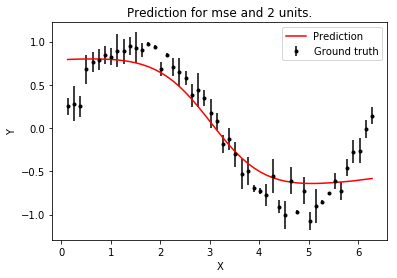

In [9]:
train_and_visualize(loss='mse', optimizer='Adagrad', epochs=100000, X=X, Y=Y, DY=DY, batch_size=-1, hidden_units=2,
                   learning_rate=0.01, message_frequency=1000)